In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from project_utils import *
from global_params import *
TABLE_FIG_SIZE = 50
TABLE_NUM_ROWS = 3
TABLE_NUM_COLS = 6

IMG_ROWS = 80
IMG_COLS = 112

# enter relevant data paths
TRAIN_DATA_PATH = 'Enter path here'
TEST_DATA_PATH = 'Enter path here'

# Create Variables:

In [2]:
create_train_data(TRAIN_DATA_PATH)
create_val_data(TRAIN_DATA_PATH)
create_test_data(TEST_DATA_PATH)
create_iso_masks()

------------------------------
Creating training images...
------------------------------
Done: 0/5635 images
Done: 100/5635 images
Done: 200/5635 images
Done: 300/5635 images
Done: 400/5635 images
Done: 500/5635 images
Done: 600/5635 images
Done: 700/5635 images
Done: 800/5635 images
Done: 900/5635 images
Done: 1000/5635 images
Done: 1100/5635 images
Done: 1200/5635 images
Done: 1300/5635 images
Done: 1400/5635 images
Done: 1500/5635 images
Done: 1600/5635 images
Done: 1700/5635 images
Done: 1800/5635 images
Done: 1900/5635 images
Done: 2000/5635 images
Done: 2100/5635 images
Done: 2200/5635 images
Done: 2300/5635 images
Done: 2400/5635 images
Done: 2500/5635 images
Done: 2600/5635 images
Done: 2700/5635 images
Done: 2800/5635 images
Done: 2900/5635 images
Done: 3000/5635 images
Done: 3100/5635 images
Done: 3200/5635 images
Done: 3300/5635 images
Done: 3400/5635 images
Done: 3500/5635 images
Done: 3600/5635 images
Done: 3700/5635 images
Done: 3800/5635 images
Done: 3900/5635 images
Do

  0%|          | 0/4436 [00:00<?, ?it/s]

  0%|          | 0/1199 [00:00<?, ?it/s]

# Loading Variables:

In [3]:
imgs_train, imgs_mask_train = load_train_data()
imgs_val, imgs_mask_val = load_val_data()

# Preprocessing and scaling:

In [4]:
imgs_train = preprocess(imgs_train)
imgs_mask_train = preprocess(imgs_mask_train)
imgs_val = preprocess(imgs_val)
imgs_mask_val = preprocess(imgs_mask_val)

imgs_train = imgs_train.astype('float32')
imgs_val = imgs_val.astype('float32')



mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization

imgs_train -= mean
imgs_train /= std

imgs_val -= mean
imgs_val /= std

imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255.  # scale masks to [0, 1]

imgs_mask_val = imgs_mask_val.astype('float32')
imgs_mask_val /= 255.

# Random training data masks

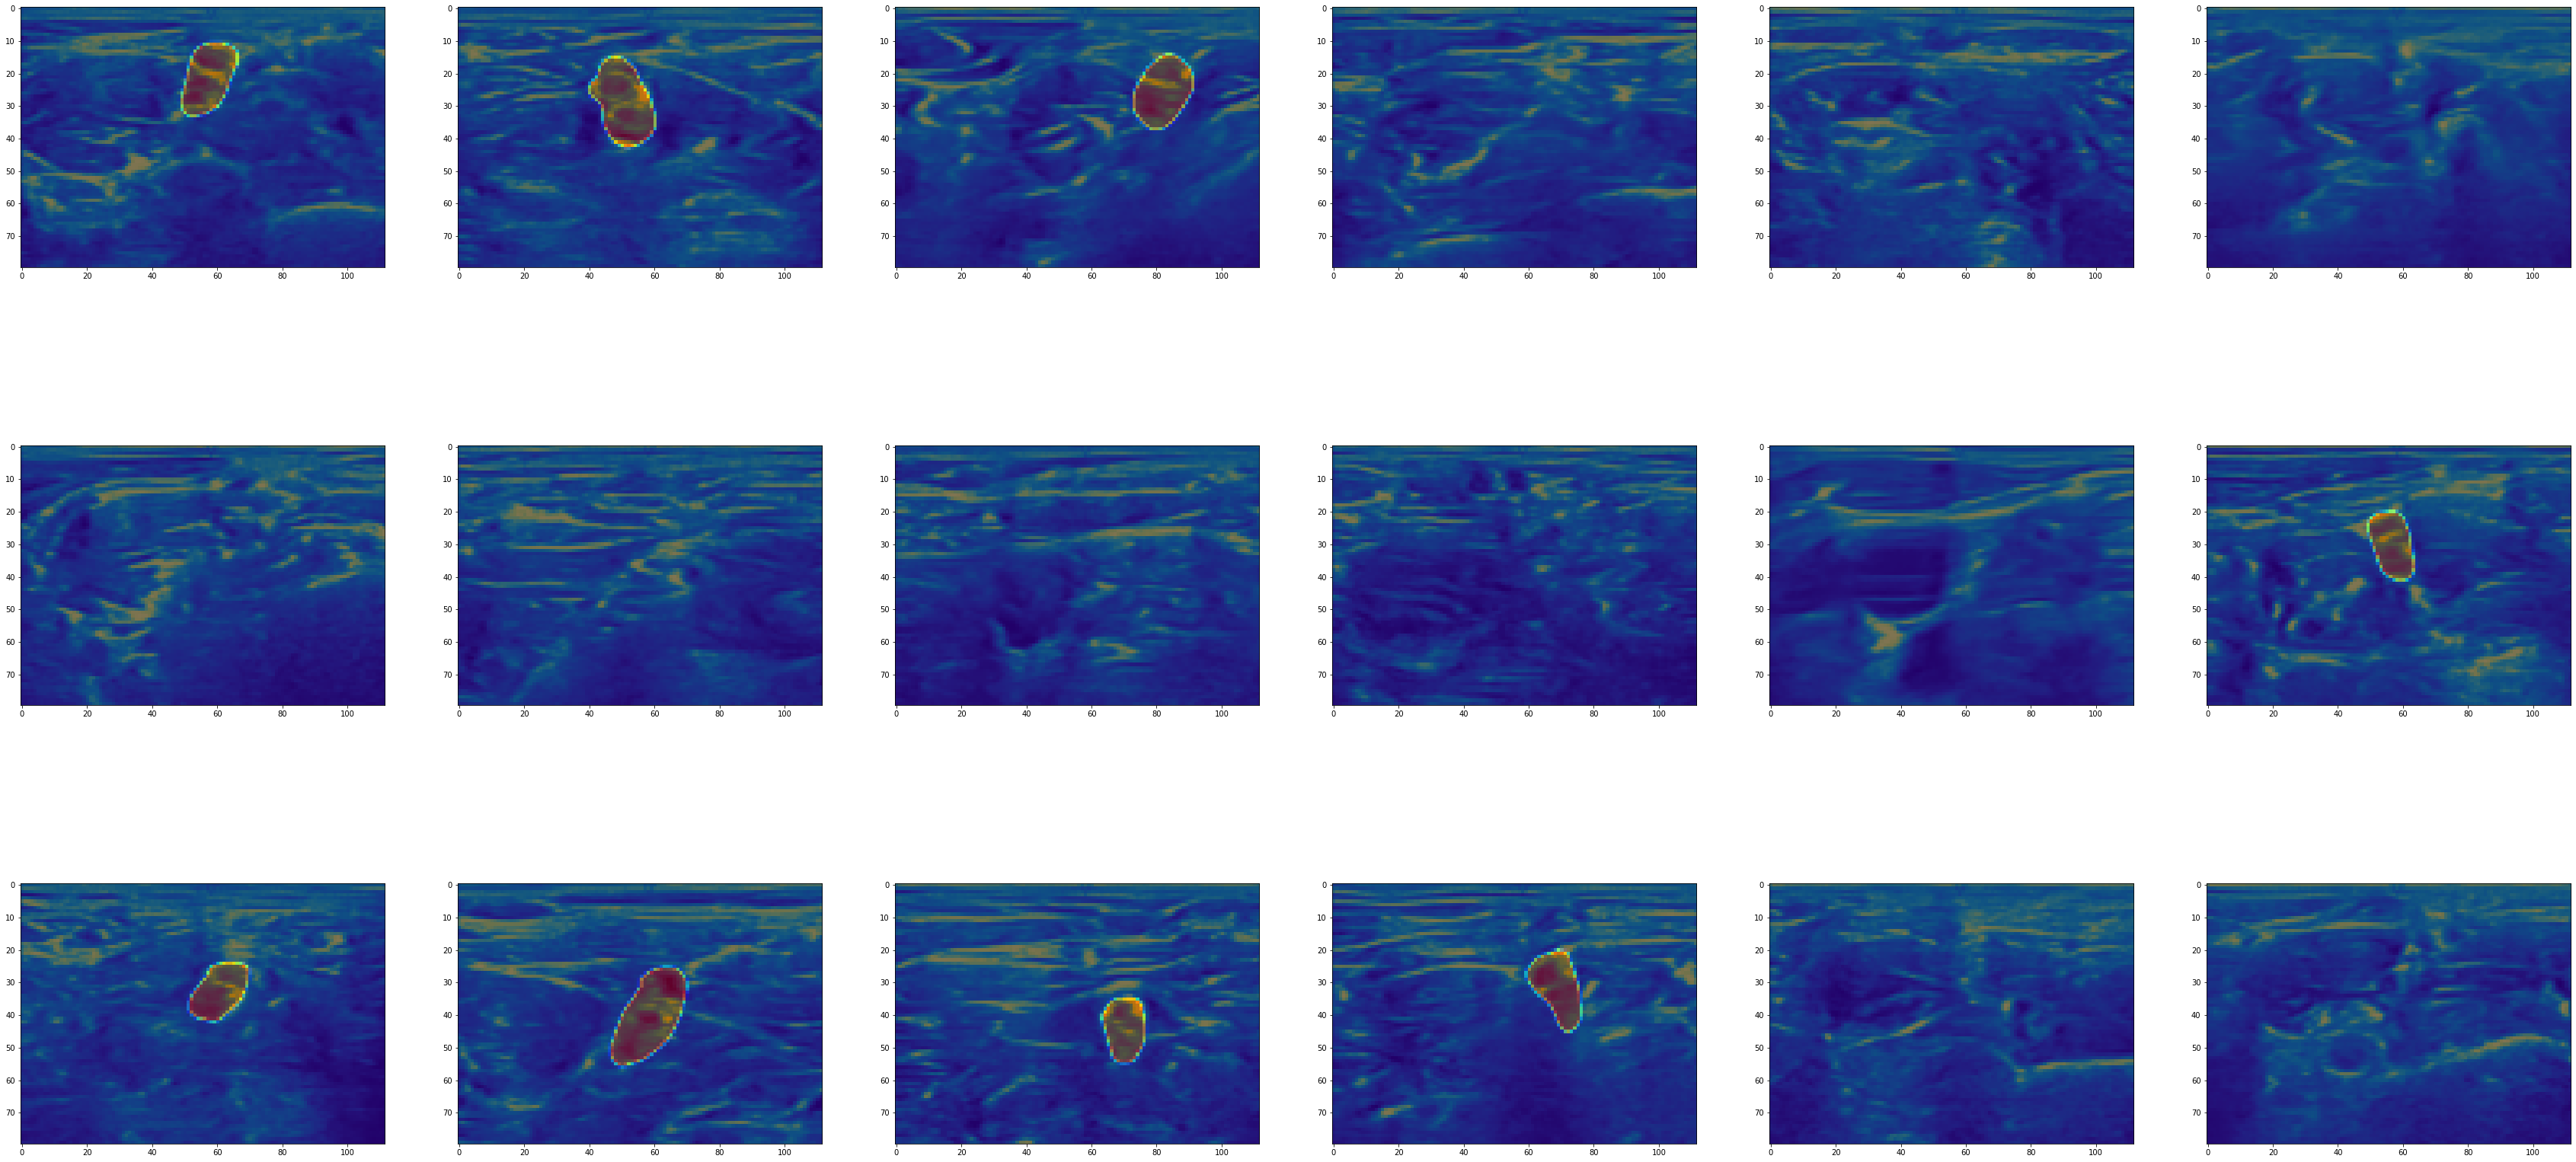

In [5]:
ii_train = np.random.choice(len(imgs_train), TABLE_NUM_ROWS * TABLE_NUM_COLS)

plt.figure(figsize=[TABLE_NUM_COLS * 10,TABLE_NUM_ROWS * 10])

for i in range(TABLE_NUM_ROWS * TABLE_NUM_COLS):
    plt.subplot(TABLE_NUM_ROWS, TABLE_NUM_COLS ,i + 1)
    img = imgs_train[ii_train[i], :, :, 0]
    mask = imgs_mask_train[ii_train[i], :, :, 0]
    plt.imshow(img)
    plt.imshow(mask, cmap='jet', alpha=0.5)
plt.show()

# Random validation data masks

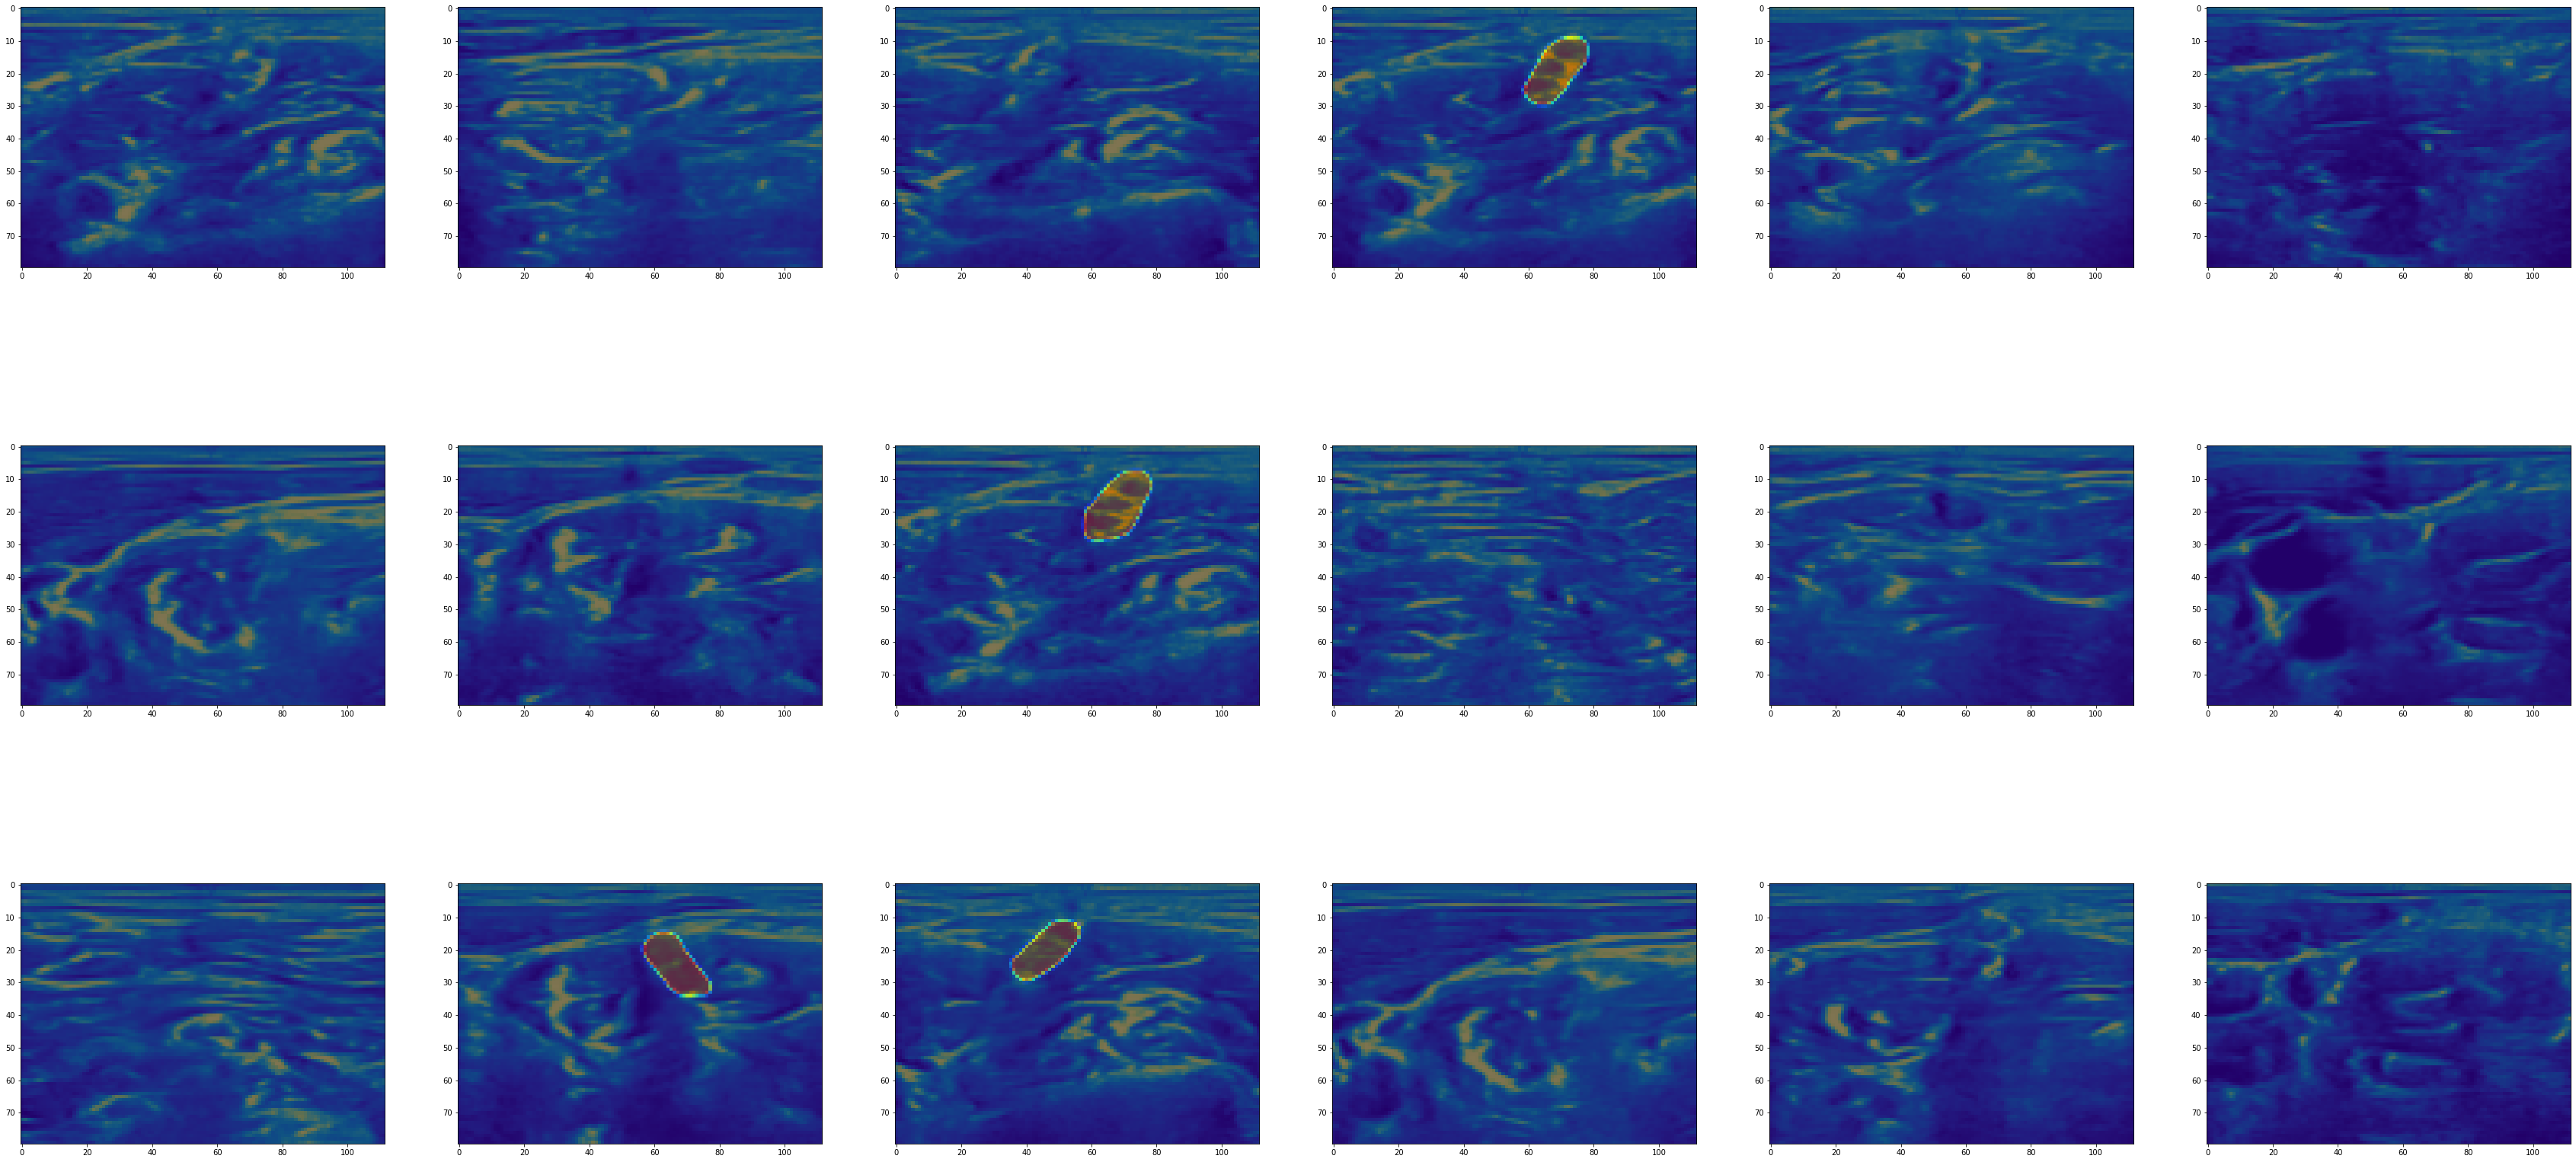

In [6]:
ii_val = np.random.choice(len(imgs_val), TABLE_NUM_ROWS * TABLE_NUM_COLS)

plt.figure(figsize=[TABLE_NUM_COLS * 10,TABLE_NUM_ROWS * 10])

for i in range(TABLE_NUM_ROWS * TABLE_NUM_COLS):
    plt.subplot(TABLE_NUM_ROWS, TABLE_NUM_COLS ,i + 1)
    img = imgs_val[ii_val[i], :, :, 0]
    mask = imgs_mask_val[ii_val[i], :, :, 0]
    plt.imshow(img)
    plt.imshow(mask, cmap='jet', alpha=0.5)
plt.show()

# Masks sizes distribution (in pixels)

Mask existence percentage - Training set: 0.4186203787195672
Mask existence percentage - Validation set: 0.3886572143452877


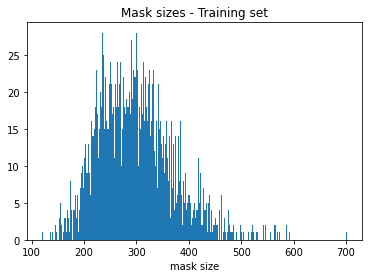

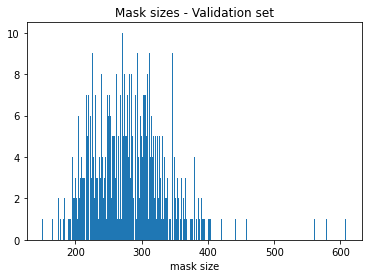

In [12]:
thresh = 0.1

plt.figure()
binary_mask = copy.deepcopy(imgs_mask_train)
binary_mask[binary_mask >= thresh] = 1
binary_mask[binary_mask < thresh] = 0
pp = calc_pixel_sum(binary_mask)
plt.title('Mask sizes - Training set')
plt.xlabel('mask size')
plt.hist(pp[pp != 0], bins=300);
print('Mask existence percentage - Training set: ' + str(len(pp[pp != 0])/len(pp)))

plt.figure()
binary_mask = copy.deepcopy(imgs_mask_val)
binary_mask[binary_mask >= thresh] = 1
binary_mask[binary_mask < thresh] = 0
pp = calc_pixel_sum(binary_mask)
plt.title('Mask sizes - Validation set')
plt.xlabel('mask size')
plt.hist(pp[pp != 0], bins=300);
print('Mask existence percentage - Validation set: ' + str(len(pp[pp != 0])/len(pp)))


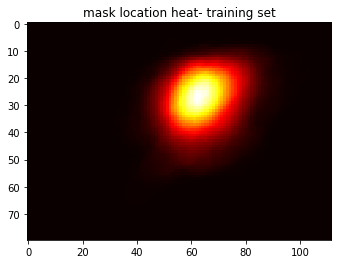

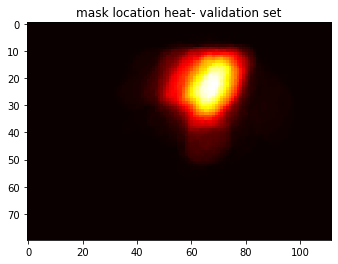

In [13]:
thresh = 0.1
def create_heatmap(imgs):
    heat_map = np.zeros((IMG_ROWS, IMG_COLS))
    for k in range(len(imgs)):
        cur_mask = imgs[k, :, :, 0] #  removing redundant last channel 
        iis = np.where(cur_mask > thresh)
        heat_map[iis] += 1
    return heat_map

# training set
heat_map = create_heatmap(imgs_mask_train)
plt.figure()
plt.title('mask location heat- training set')
plt.imshow(heat_map, cmap='hot', interpolation='nearest')

# validation set
heat_map = create_heatmap(imgs_mask_val)
plt.figure()
plt.title('mask location heat- validation set')
plt.imshow(heat_map, cmap='hot', interpolation='nearest')